<a href="https://colab.research.google.com/github/swati-project/sarcasm-detection-api/blob/main/RandomForest_XBGoost_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load dataset**

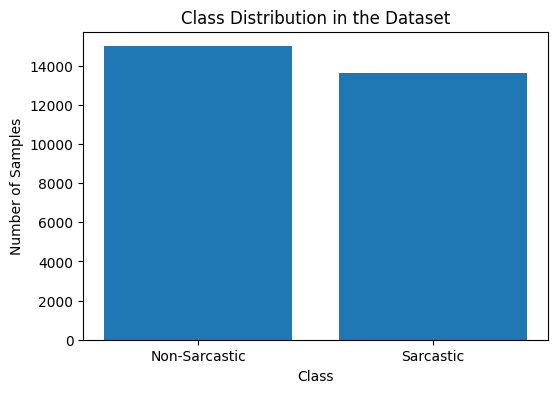

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)

# Count number of samples in each class
class_counts = data['is_sarcastic'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

print(class_counts)




# **TF-IDF**

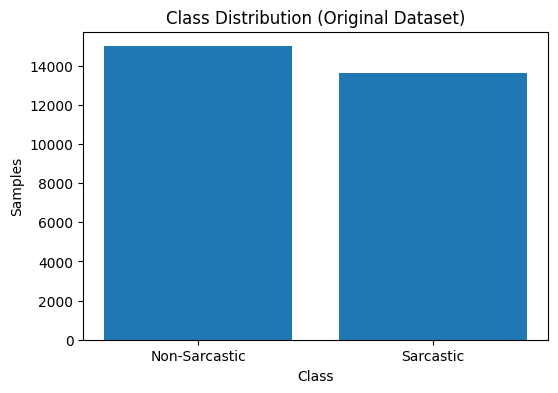

0    14985
1    13634
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)

data = data.rename(columns={
    "headline": "text",
    "is_sarcastic": "label"
})

texts = data["text"].tolist()
labels = data["label"].tolist()

# TF-IDF
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(texts)

# Class distribution
class_counts = pd.Series(labels).value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(["Non-Sarcastic", "Sarcastic"], class_counts.values)
plt.xlabel("Class")
plt.ylabel("Samples")
plt.title("Class Distribution (Original Dataset)")
plt.show()

print(class_counts)


## **Random Forest (Bagging)**

Accuracy  : 0.758
Precision : 0.757
Recall    : 0.724
F1-score  : 0.740


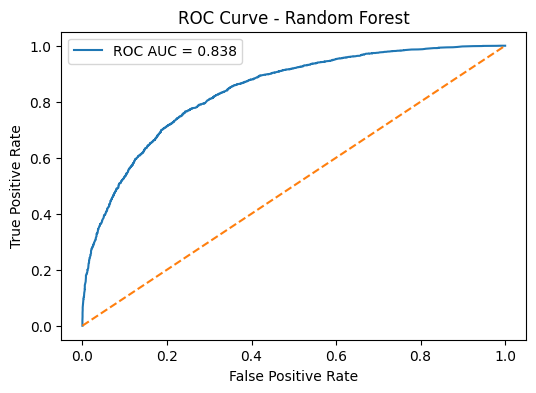

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc
)

# =========================
# Load Dataset (CORRECT)
# =========================
data = pd.read_json(
    "/content/Sarcasm_Headlines_Dataset_v2.json",
    lines=True
)

# Rename columns for clarity
data = data.rename(columns={
    "headline": "text",
    "is_sarcastic": "label"
})

X = data["text"]
y = data["label"]

# =========================
# Train–Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# TF-IDF Vectorization
# =========================
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# =========================
# Random Forest (Bagging built-in)
# =========================
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_model.fit(X_train_tfidf, y_train)

# =========================
# Predictions
# =========================
y_pred = rf_model.predict(X_test_tfidf)
y_proba = rf_model.predict_proba(X_test_tfidf)[:, 1]

# =========================
# Metrics
# =========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")

# =========================
# ROC Curve
# =========================
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


# **XGBoost (Boosting)**

Accuracy: 0.718

Confusion Matrix:
[[2557  440]
 [1174 1553]]

Classification Report:
               precision    recall  f1-score   support

Non-Sarcastic       0.69      0.85      0.76      2997
    Sarcastic       0.78      0.57      0.66      2727

     accuracy                           0.72      5724
    macro avg       0.73      0.71      0.71      5724
 weighted avg       0.73      0.72      0.71      5724



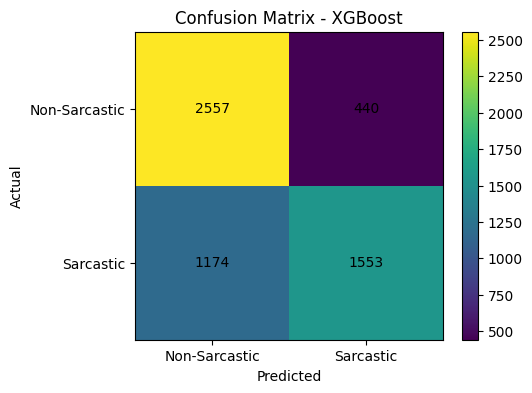

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost as xgb

# =========================
# Load Dataset (CORRECT)
# =========================
data = pd.read_json(
    "/content/Sarcasm_Headlines_Dataset_v2.json",
    lines=True
)

# Rename columns for consistency
data = data.rename(columns={
    "headline": "text",
    "is_sarcastic": "label"
})

X = data["text"]
y = data["label"]

# =========================
# Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================
# TF-IDF Vectorization
# =========================
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# =========================
# XGBoost Classifier (CORRECT SETTINGS)
# =========================
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42
)

xgb_model.fit(X_train_tfidf, y_train)

# =========================
# Predictions
# =========================
y_pred = xgb_model.predict(X_test_tfidf)

# =========================
# Metrics
# =========================
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(
    y_test, y_pred,
    target_names=["Non-Sarcastic", "Sarcastic"]
)

print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# =========================
# Confusion Matrix Plot
# =========================
plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix)
plt.title("Confusion Matrix - XGBoost")
plt.colorbar()
plt.xticks([0, 1], ["Non-Sarcastic", "Sarcastic"])
plt.yticks([0, 1], ["Non-Sarcastic", "Sarcastic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j],
                 ha="center", va="center")

plt.show()


# **LSTM (Deep Learning)**

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.5255 - loss: 0.6924 - val_accuracy: 0.5178 - val_loss: 0.6925
Epoch 2/5
287/287 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.5199 - loss: 0.6925 - val_accuracy: 0.5178 - val_loss: 0.6931
Epoch 3/5
287/287 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.5244 - loss: 0.6922 - val_accuracy: 0.5178 - val_loss: 0.6926
Epoch 4/5
287/287 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.5212 - loss: 0.6923 - val_accuracy: 0.5178 - val_loss: 0.6926
Epoch 5/5
287/287 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - accuracy: 0.5224 - loss: 0.6923 - val_accuracy: 0.5178 - val_loss: 0.6927
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Accuracy : 0.524
Precision: 0.000
Recall   : 0.000
F1-score : 0.000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


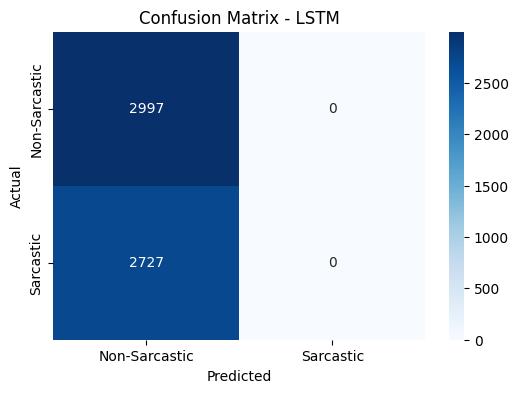


Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      2997
           1       0.00      0.00      0.00      2727

    accuracy                           0.52      5724
   macro avg       0.26      0.50      0.34      5724
weighted avg       0.27      0.52      0.36      5724



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)

# =========================
# Load Dataset (CORRECT)
# =========================
data = pd.read_json(
    "/content/Sarcasm_Headlines_Dataset_v2.json",
    lines=True
)

# Rename columns
data = data.rename(columns={
    "headline": "text",
    "is_sarcastic": "label"
})

texts = data["text"].tolist()
labels = data["label"].tolist()

# =========================
# Train–Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# =========================
# Tokenization
# =========================
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

y_train = np.array(y_train)
y_test = np.array(y_test)

# =========================
# LSTM Model
# =========================
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# =========================
# Train Model
# =========================
model.fit(
    X_train_pad,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# =========================
# Evaluation
# =========================
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

# =========================
# Confusion Matrix
# =========================
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Sarcastic", "Sarcastic"],
    yticklabels=["Non-Sarcastic", "Sarcastic"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
